# PyCHO Geopandas Workshop

In [1]:
!conda install --yes geopandas descartes folium contextily

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - contextily
  - folium

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [2]:
import pandas as pd
import geopandas as gpd
import descartes
import contextily
import matplotlib.pyplot as plt
import folium

/Users/ep9k/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


# Open Police Data

OpenPoliceData is a Python package that provides easy access to 282 (and growing) incident-level open datasets from police departments around the United States. Datasets include traffic stops, use of force, officer-involved shootings, complaints, and other types of police interactions.

Users request data by department name and type of data. The data is returned as a pandas DataFrame. There is no need to manually find the data online or make API calls. 

In [3]:
!pip install openpolicedata

In [4]:
import openpolicedata as opd

In [5]:
data = opd.Source(source_name="Virginia")

In [7]:
data.datasets

,State,SourceName,Agency,TableType,Year,Description,DataType,URL,date_field,dataset_id,agency_field,min_version,readme
0,Virginia,Virginia,MULTI,STOPS,MULTI,A data collection consisting of all traffic and investigatory stops made in Virginia as aggregated by Virginia Department of State Police,Socrata,data.virginia.gov,incident_date,2c96-texw,agency_name,<NA>,https://data.virginia.gov/api/views/2c96-texw/files/3f2e466d-eaff-4a74-8ba6-ca97ab28597c?download=true&filename=Community%20Policing%20Data%20Instructions%20&%20Technical%20Specifications%20v5.2.pdf


In [10]:
agencies = data.get_agencies(partial_name="Richmond")
agencies

['University Of Richmond Police Department',
 "Richmond County Sheriff's Office",
 'Richmond International Airport Police',
 'Richmond Police Department']

In [12]:
agency = "Richmond Police Department"
table = data.load_from_url(year=2022, table_type='STOPS', agency=agency)
table

state: Virginia,
source_name: Virginia,
agency: Richmond Police Department,
table_type: TableType.STOPS,
year: 2022,
description: A data collection consisting of all traffic and investigatory stops made in Virginia as aggregated by Virginia Department of State Police,
url: data.virginia.gov

In [19]:
richmond_df = table.table
richmond_df

,incident_date,agency_name,jurisdiction,reason_for_stop,person_type,race,ethnicity,age,gender,english_speaking,action_taken,specific_violation,person_searched,vehicle_searched,physical_force_by_officer,physical_force_by_subject,residency
0,2022-01-01,Richmond Police Department,RICHMOND CITY,TRAFFIC VIOLATION,DRIVER,WHITE,NON-HISPANIC,39,MALE,YES,CITATION/SUMMONS,46.2-646,NO,NO,NO,NO,NaN
1,2022-01-01,Richmond Police Department,RICHMOND CITY,EQUIPMENT VIOLATION,DRIVER,WHITE,NON-HISPANIC,38,MALE,YES,CITATION/SUMMONS,46.2-1158,NO,NO,NO,NO,NaN
2,2022-01-01,Richmond Police Department,RICHMOND CITY,TRAFFIC VIOLATION,DRIVER,BLACK OR AFRICAN AMERICAN,NON-HISPANIC,20,FEMALE,YES,WARNING,46.2-875,NO,NO,NO,NO,NaN
3,2022-01-01,Richmond Police Department,RICHMOND CITY,TRAFFIC VIOLATION,DRIVER,WHITE,NON-HISPANIC,21,FEMALE,YES,CITATION/SUMMONS,46.2-870,NO,NO,NO,NO,NaN
4,2022-01-01,Richmond Police Department,RICHMOND CITY,TRAFFIC VIOLATION,DRIVER,BLACK OR AFRICAN AMERICAN,NON-HISPANIC,43,MALE,YES,CITATION/SUMMONS,46.2-862(i),NO,NO,NO,NO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978,2022-09-29,Richmond Police Department,RICHMOND CITY,TRAFFIC VIOLATION,DRIVER,WHITE,NON-HISPANIC,0,MALE,YES,CITATION/SUMMONS,46.2-875,NO,NO,NO,NO,RESIDENT OF TOWN/CITY/COUNTY OF STOP
1979,2022-09-29,Richmond Police Department,RICHMOND CITY,TRAFFIC VIOLATION,DRIVER,BLACK OR AFRICAN AMERICAN,NON-HISPANIC,0,FEMALE,YES,WARNING,46.2-875,NO,NO,NO,NO,RESIDENT OF TOWN/CITY/COUNTY OF STOP
1980,2022-09-29,Richmond Police Department,RICHMOND CITY,TRAFFIC VIOLATION,DRIVER,BLACK OR AFRICAN AMERICAN,NON-HISPANIC,0,MALE,YES,CITATION/SUMMONS,18.2-272(A),NO,NO,NO,NO,RESIDENT OF TOWN/CITY/COUNTY OF STOP
1981,2022-09-29,Richmond Police Department,RICHMOND CITY,TRAFFIC VIOLATION,DRIVER,WHITE,NON-HISPANIC,40,FEMALE,YES,WARNING,46.2-845,NO,NO,NO,NO,RESIDENT OF TOWN/CITY/COUNTY OF STOP


In [21]:
richmond_df['reason_for_stop'].value_counts()

TRAFFIC VIOLATION      1858
EQUIPMENT VIOLATION     100
CHECK POINT              14
TERRY STOP                6
OTHER                     3
CALLS FOR SERVICE         2
Name: reason_for_stop, dtype: int64

## City of Richmond GIS Data

[From Richmond GeoHub](https://richmond-geo-hub-cor.hub.arcgis.com/)

In [42]:
###### CHANGE LATER
my_path = '/Users/ep9k/Desktop/geopandas_OpenPoliceData_workshop/RichmondData'   ##### CHANGE THIS TO YOUR PATH!

<AxesSubplot:>

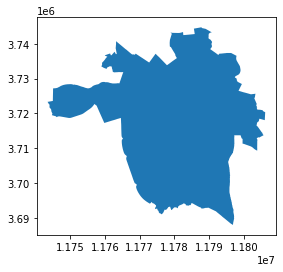

In [33]:
richmond_boundary = gpd.read_file(my_path + "/City_Boundary/City_Boundary.shp")
richmond_boundary.plot()

## Coordinate Reference Systems

In [34]:
richmond_boundary.crs

<Derived Projected CRS: EPSG:2284>
Name: NAD83 / Virginia South (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Virginia - counties of Accomack; Albemarle; Alleghany; Amelia; Amherst; Appomattox; Bedford; Bland; Botetourt; Bristol; Brunswick; Buchanan; Buckingham; Campbell; Carroll; Charles City; Charlotte; Chesapeake; Chesterfield; Colonial Heights; Craig; Cumberland; Dickenson; Dinwiddie; Essex; Floyd; Fluvanna; Franklin; Giles; Gloucester; Goochland; Grayson; Greensville; Halifax; Hampton; Hanover; Henrico; Henry; Isle of Wight; James City; King and Queen; King William; Lancaster; Lee; Louisa; Lunenburg; Lynchburg; Mathews; Mecklenburg; Middlesex; Montgomery; Nelson; New Kent; Newport News; Norfolk; Northampton; Northumberland; Norton; Nottoway; Patrick; Petersburg; Pittsylvania; Portsmouth; Powhatan; Prince Edward; Prince George; Pulaski; Richmond; Roanoke; Rockbridge; Russell; Scott;

<AxesSubplot:>

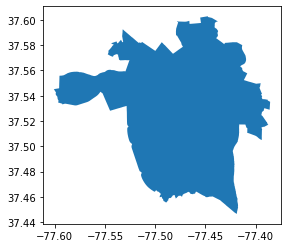

In [35]:
richmond_boundary = richmond_boundary.to_crs(epsg=4326)
richmond_boundary.plot()

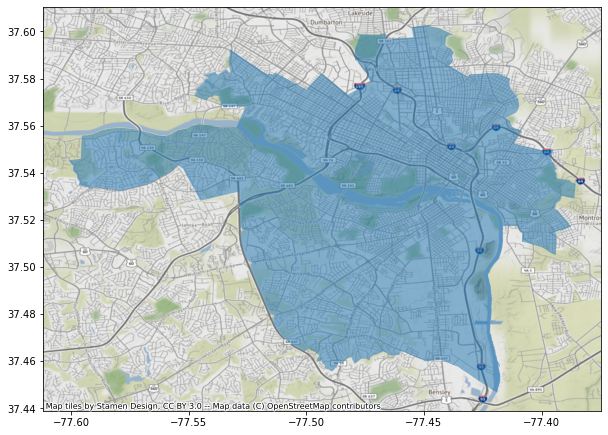

In [37]:
# find this code in geopanda docs: https://geopandas.org/en/stable/gallery/plotting_basemap_background.html?highlight=basemap

ax = richmond_boundary.plot(figsize=(10,8), alpha=0.5)
contextily.add_basemap(ax, crs=richmond_boundary.crs)

In [41]:
roads = gpd.read_file(my_path + '/Roads.geojson')


/Users/ep9k/Desktop/geopandas_OpenPoliceData_workshop/RichmondData/Roads.geojson: No such file or directory


DriverError: /Users/ep9k/Desktop/geopandas_OpenPoliceData_workshop/RichmondData/Roads.geojson: No such file or directory

In [ ]:
"